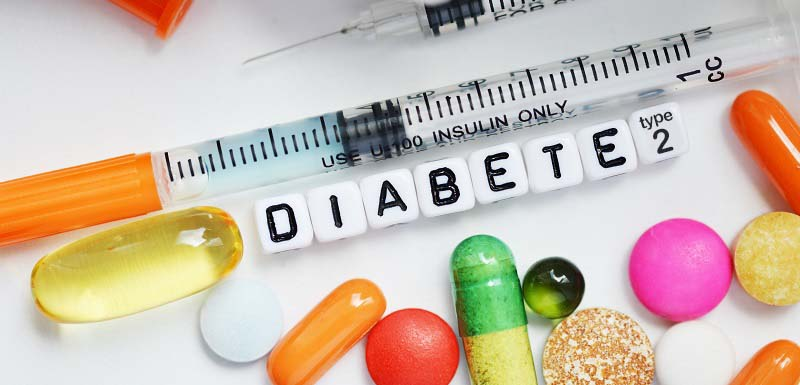



<center>
    <figcaption itemprop="Image Taken From Here"><a href="https://infos-diabete.com/diabete-type-2-complications/">DIABETE</a></figcaption>
</center>
<br>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It is tried to decide whether the person has diabetes or not with this data set. The dataset has 9 column and one of them is our target variable.

**📜 Table Of Contents:**
* [EDA](#section-one)
    - [I. MISSING VALUE](#section-two)
    - [II. OUTLIER DETECTION & HANDLING](#section-three)
    - [III. CORRELATION](#section-four)
    - [IV. FEATURE EXTRACTION](#section-five)
* [VISUALIZATION](#section-six)
    - [I. OUTLIER](#section-seven)
    - [II. DISTRIBUTION](#section-eight)
    - [III. DIABETES RATIO](#section-nine)
    - [IV. VISUALIZATION of EXTRACTED FEATURES](#section-ten)
* [MACHINE LEARNING](#section-eleven)
* [MODEL PERFORMANCE](#section-twelve)
* [CONCLUSION](#section-thirteen)

Let's dig deeper to better understand the variables with the help of the domain knowledge I have acquired.

1. **Pregnancies:** Number of times pregnant
  - Gestational diabetes is high blood sugar (glucose) that develops during pregnancy and usually disappears after giving birth.
  - Gestational diabetes mellitus (GDM)  is a condition in which a hormone made by the placenta prevents the body from using insulin effectively. Glucose builds up in the blood instead of being absorbed by the cells.
  - Any woman can develop gestational diabetes during pregnancy, but an increased risk if:
        * Over Age 40
        * BMI Over Than 30
        * give birth to a macrosomic infant, as defined as a birthweight greater than 9 lbs. (or approximately 4000 g)
  - There is two article that I have found after literature search. First one is "[Number of Births and Diabetes Risk in China's Older Women](https://www.frontiersin.org/articles/10.3389/fmed.2022.798787/full)" and the second on is "[Higher Numbers of Pregnancies Associated With an Increased Prevalence of Gestational Diabetes Mellitus: Results From the Healthy Baby Cohort Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7153959/)". I could not find any other definite information about the   relationship between birth number and diabetes. So I'm not going to make any changes on Pregnancies.
  - **Fun Fact**: Compared with high birth weight, low birth weight was associated with an increased risk of diabetes mellitus.
2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test. The results of the OGTT as a screening test for type 2 diabetes can be interpreted as follows:
  - The 2-hour plasma glucose level <140 mg/dL is considered normal
  - The 2-hour plasma glucose level of 140-199 mg/dL indicates impaired glucose tolerance
  - The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes
3. **Blood Pressure:** Diastolic blood pressure (mm Hg).
  - Blood pressure is measured using two numbers:
  - The first number, called **systolic** blood pressure, measures the pressure in your arteries when your heart beats.
  - The second number, called **diastolic** blood pressure, measures the pressure in your arteries when your heart rests between beats.
        * Low Blood Pressure: Below 60
        * Normal: 60 - 79
        * Prehypertension: 80 - 89
        * Hypertension: 90 - 120
        * Hypertensive Crisis: 120 and more      
4. **Skin Thickness:** Triceps skin fold thickness (mm)
5. **Insulin:** 2-Hour post-prandial insulin (mu U/ml).   
  - Normal      : Below 140
  - Prediabetes : 140 - 199
  - Diabetes    : 200 and more     
6. **BMI:** Body mass index
  - **Based on these figures a mean BMI of 12 as the lower limit for human survival emerges - a value first proposed by James et al (1988)**
  - If your BMI is less than 18.5, it falls within the underweight range.
  - If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
  - If your BMI is 25.0 to 29.9, it falls within the overweight range.
  - If your BMI is 30.0 or higher, it falls within the obese range.
7. **Diabetes pedigree function:** Provides some information on the history in relatives. This is a measure of genetic influence.
8. **Age** (years)
  - Infant = 0-1 year
  - Toddler = 2-4 yrs
  - Child = 5-12 yrs
  - Teen = 13-19 yrs
  - Adult = 20-39 yrs
  - Middle Age Adult = 40-59 yrs
  - Senior Adult = 60+        
9. **Target variable:** Outcome 1 indicates having diabetes; 0 indicates not having diabetes.

**Who is more likely to develop type 2 diabetes**
* over age 40
* high blood pressure.
* obesity or overweight.
* hypertension over than 130/80 mm Hg’

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df_copy = df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a id="section-one"></a>
# **EDA**

In [ ]:
def check_df(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n'
          f'Size      : {df.size}\n'
          f'Dimension : {df.ndim}')
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Tail******")
    print(data.tail(head))
    print("\n******Random Sampling******")
    print(data.sample(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe().T)

In [ ]:
check_df(df)


******Shape******
Shape     : (768, 9)
Size      : 6912
Dimension : 2

******Types******
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

******Head******
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60                      0.63   50        1
1            1       85             66             29        0 26.60                      0.35   31        0
2            8      183             64              0        0 23.30                      0.67   32        1
3            1       89             66             23       94 28.10                      0.17   21        0
4        

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results=True):

    '''
   Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
   Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        The sum of 3 lists with return equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    '''

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "flaot"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_copy)

Observations 768
Variables:  9
cat_cols:  1
num_cols:  8
cat_but_car:  0
num_but_cat:  1


<a id="section-two"></a>

## **I. MISSING VALUE**

In [ ]:
def check_missing_value(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
check_missing_value(df_copy)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


There is no missing values in the dataset. Unless when I examine the dataset at the very beginnig of notebook, I realised some columns minimum values are "0" which is not possible for some reasons (except Pregnancies).


* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI  

Let's also check the BMI lower limit (12) for human survival.

In [ ]:
df_copy[df_copy['BMI'] < 12]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.00,0.23,54,1
49,7,105,0,0,0,0.00,0.30,24,0
60,2,84,0,0,0,0.00,0.30,21,0
81,2,74,0,0,0,0.00,0.10,22,0
145,0,102,75,23,0,0.00,0.57,21,0
371,0,118,64,23,89,0.00,1.73,21,0
426,0,94,0,0,0,0.00,0.26,25,0
494,3,80,0,0,0,0.00,0.17,22,0
522,6,114,0,0,0,0.00,0.19,26,0
684,5,136,82,0,0,0.00,0.64,69,0


Let's examine the zero-assigned rows and consider them as missing values of these variables.

In [ ]:
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in missing_value:
    print(col, df_copy.loc[df_copy[col] == 0].shape[0])
    df_copy[col] = np.where(df_copy[col] == 0, np.nan, df_copy[col])

check_missing_value(df_copy)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [ ]:
df_copy = df_copy.fillna(df_copy.groupby('Outcome').transform('median'))

<a id="section-three"></a>
## **II. OUTLIER DETECTION & HANDLING**

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df_copy, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction True
Age False


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, replace_with_thresholds(df_copy, col))

Pregnancies None
Glucose None
BloodPressure None
SkinThickness None
Insulin None
BMI None
DiabetesPedigreeFunction None
Age None


<a id="section-four"></a>
## **III. CORRELATION**

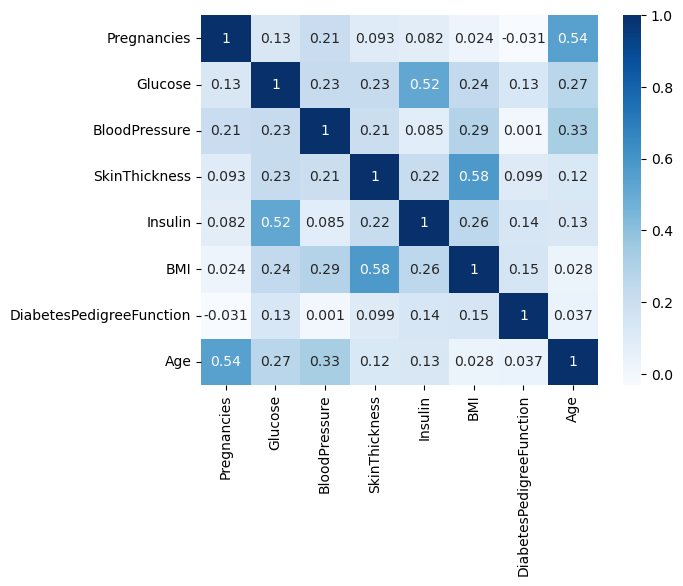

In [ ]:
corr = df_copy[num_cols].corr()
sns.heatmap(corr, cmap="Blues", annot=True);

<a id="section-five"></a>
## **IV. FEATURE EXTRACTION**

In [ ]:
def feature_extraction(dataframe):
    dataframe['Insulin_CAT'] = pd.cut(x=dataframe['Insulin'],
                                      bins=[0, 140, 199, np.inf],
                                      labels=["Normal", "Prediabetes", "Diabetes"])

    dataframe['BloodPressure_CAT'] = pd.cut(x=dataframe['BloodPressure'],
                                            bins=[0, 60, 80, 90, 120, np.inf],
                                            labels=["Low_Blood_Pressure", "Normal",
                                                    "Prehypertension", "Hypertension",
                                                    "Hypertensive_Crisis"])

    dataframe['Glucose_CAT'] = pd.cut(x=dataframe['Glucose'],
                                      bins=[0, 140, 199, np.inf],
                                      labels=["Normal", "Impaired_Glucose_Tolerance",
                                              "Diabetes"])

    dataframe['BMI_CAT'] = pd.cut(x=dataframe['BMI'],
                                  bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9,  np.inf],
                                  labels=["Underweight", "Healthy", "Overweight",
                                          "Obese_Class1", "Obese_Class2", "Obese_Class3"])

    dataframe['Age_CAT'] = pd.cut(x=dataframe['Age'],
                                  bins=[20, 40, 60, np.inf],
                                  labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])

    dataframe.loc[(dataframe['Age'] > 40)
                  & (dataframe['BloodPressure_CAT'] == 'Hypertension')
                  & ((dataframe["BMI_CAT"] == "Overweight")
                     | (dataframe["BMI_CAT"] == "Obese_Class1")
                     | (dataframe["BMI_CAT"] == "Obese_Class2")
                     | (dataframe["BMI_CAT"] == "Obese_Class3")), "Life_Level_CAT"] = "At_Risk"

    dataframe['Life_Level_CAT'].fillna('Not_Risk', inplace = True)

In [ ]:
feature_extraction(df_copy)

<a id="section-six"></a>
# **VISUALIZATION**

<a id="section-seven"></a>

## **I. OUTLIERS**

In [ ]:
def boxplot_for_outliers(dataframe):
    a = 2
    b = 4
    c = 1
    results = []
    colors=[]

    palette_set3 = sns.color_palette("Set3",len(num_cols))
    for color in palette_set3.as_hex():
        colors.append(color)
    colour_num_cols = zip(num_cols, colors)

    fig = plt.figure(figsize = (20, 10))
    for col, color in colour_num_cols:
        plt.subplot(a, b, c)
        sns.boxplot(dataframe[col], color=color)
        plt.xlabel(f'{dataframe[col].name}', size=15)
        c = c + 1
        results.append(check_outlier(dataframe, col))
        if True in results:
            plt.suptitle(f'Original Dataset', size=18);
        else:
            plt.suptitle(f'Cleaned Dataset', size=18);
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    plt.show()

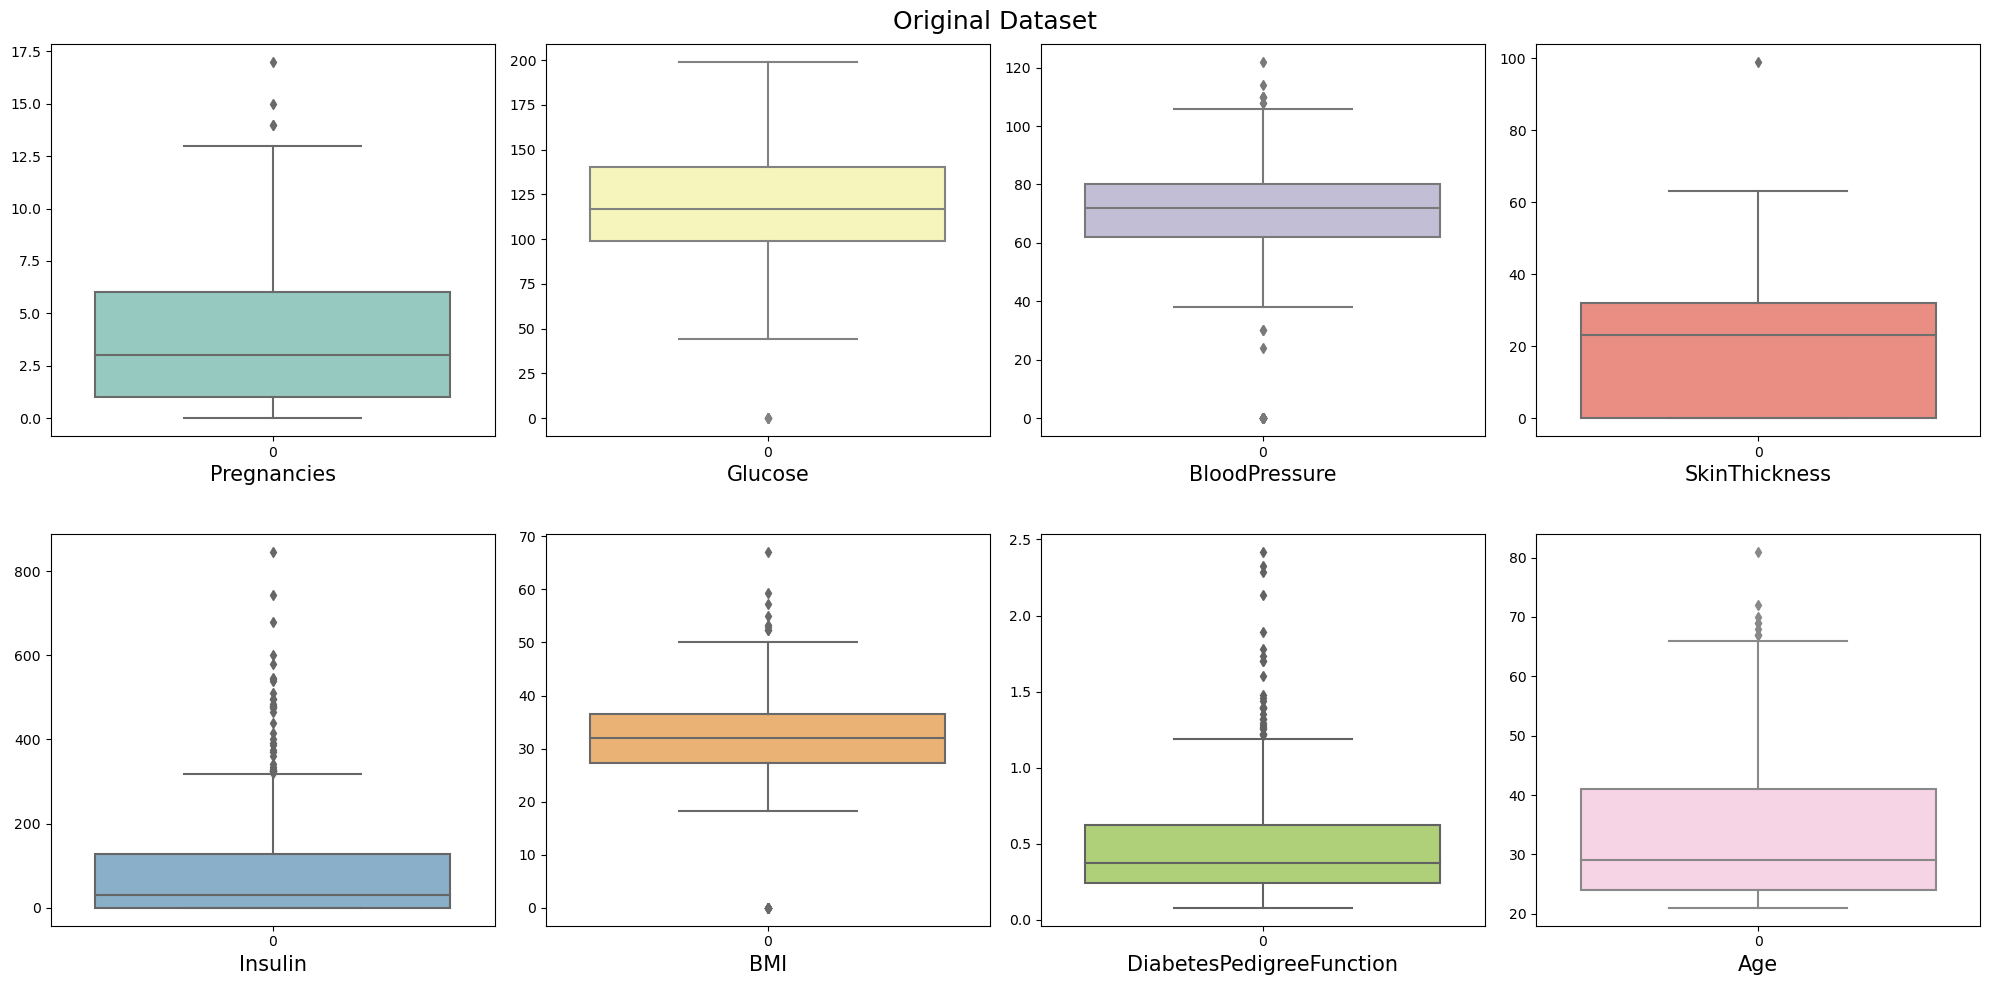

In [ ]:
boxplot_for_outliers(df)

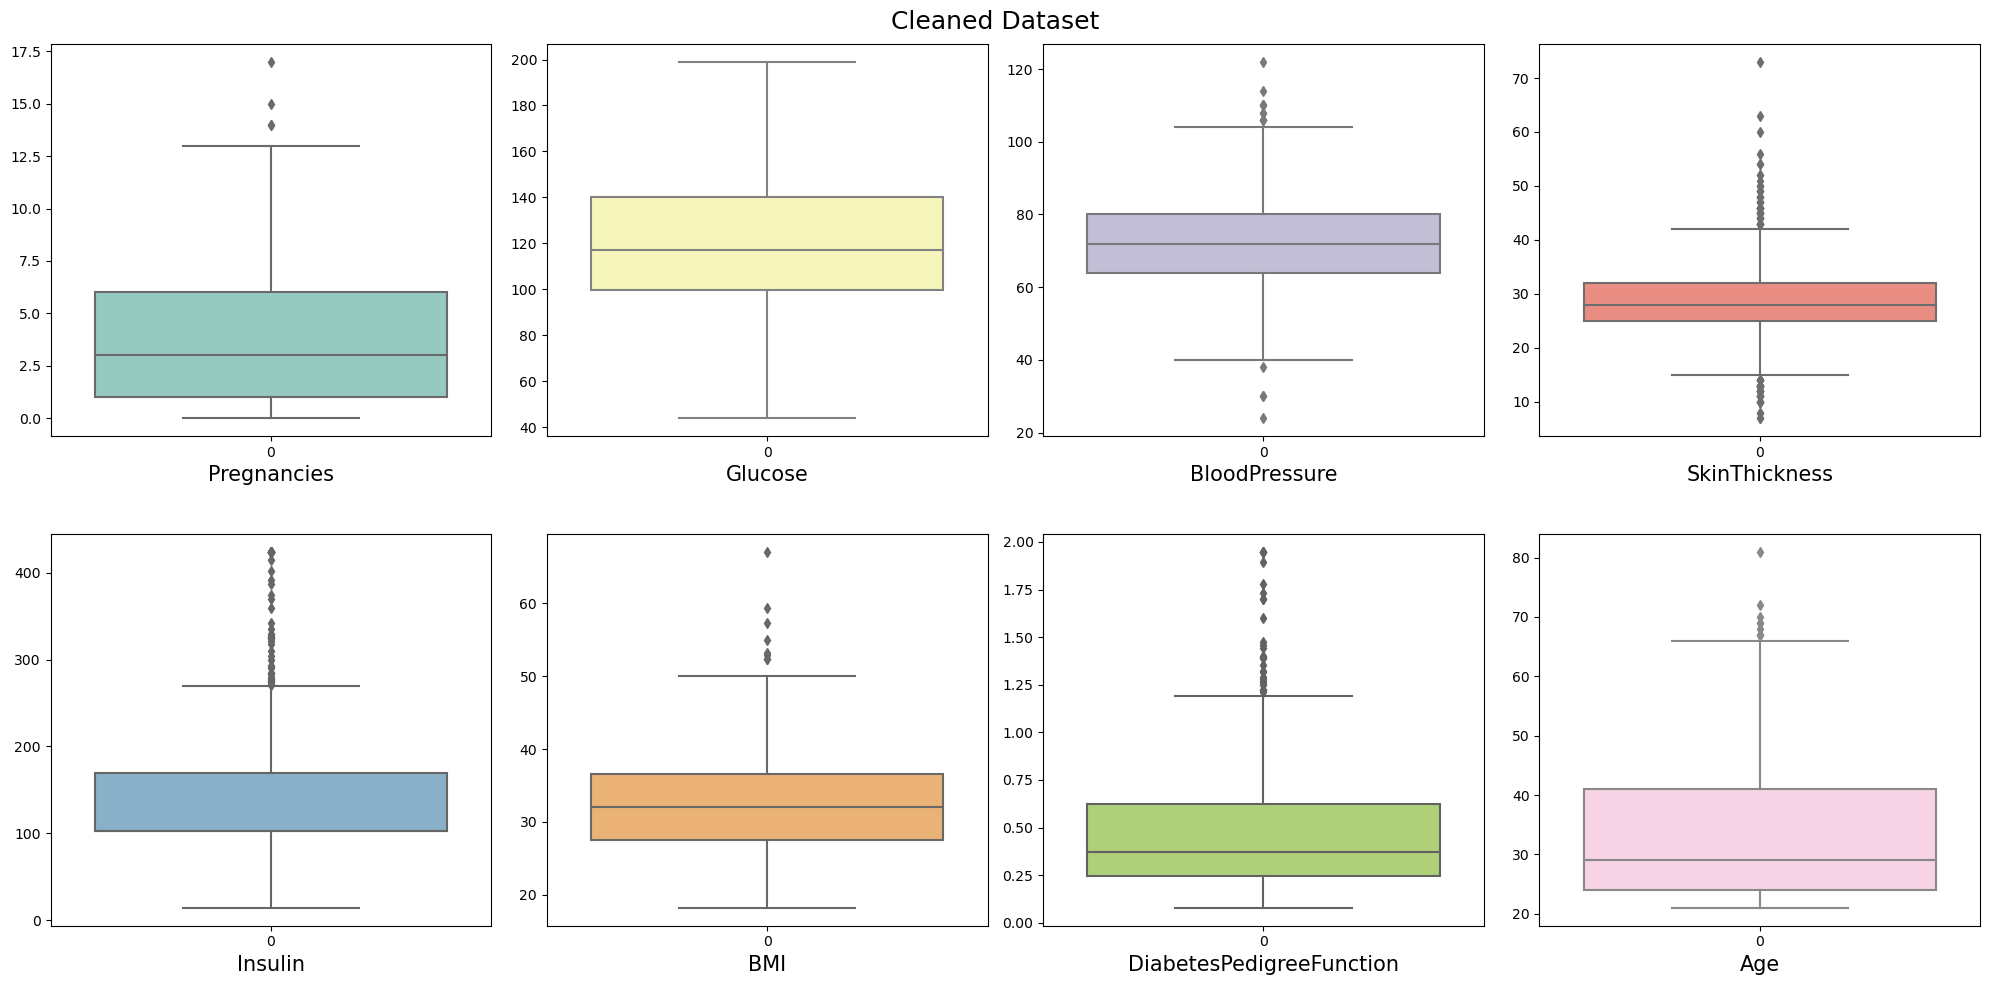

In [ ]:
boxplot_for_outliers(df_copy)

<a id="section-eight"></a>

## **II. DISTRIBUTION**

In [ ]:
def hist_plot(dataframe, title):
    a = 4
    b = 2
    c = 1
    colors=[]
    missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    palette_set2 = sns.color_palette("Paired",len(num_cols))
    for color in palette_set2.as_hex():
        colors.append(color)
    colour_num_cols = zip(missing_cols, colors)

    fig = plt.figure(figsize = (13, 15))
    for col, color in colour_num_cols:
        plt.subplot(a, b, c)
        sns.histplot(data=dataframe, x=col, kde=True, color=color);
        plt.xlabel(f'{dataframe[col].name}', size=15)
        c = c + 1
        plt.suptitle(title, size=18);

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    plt.show()

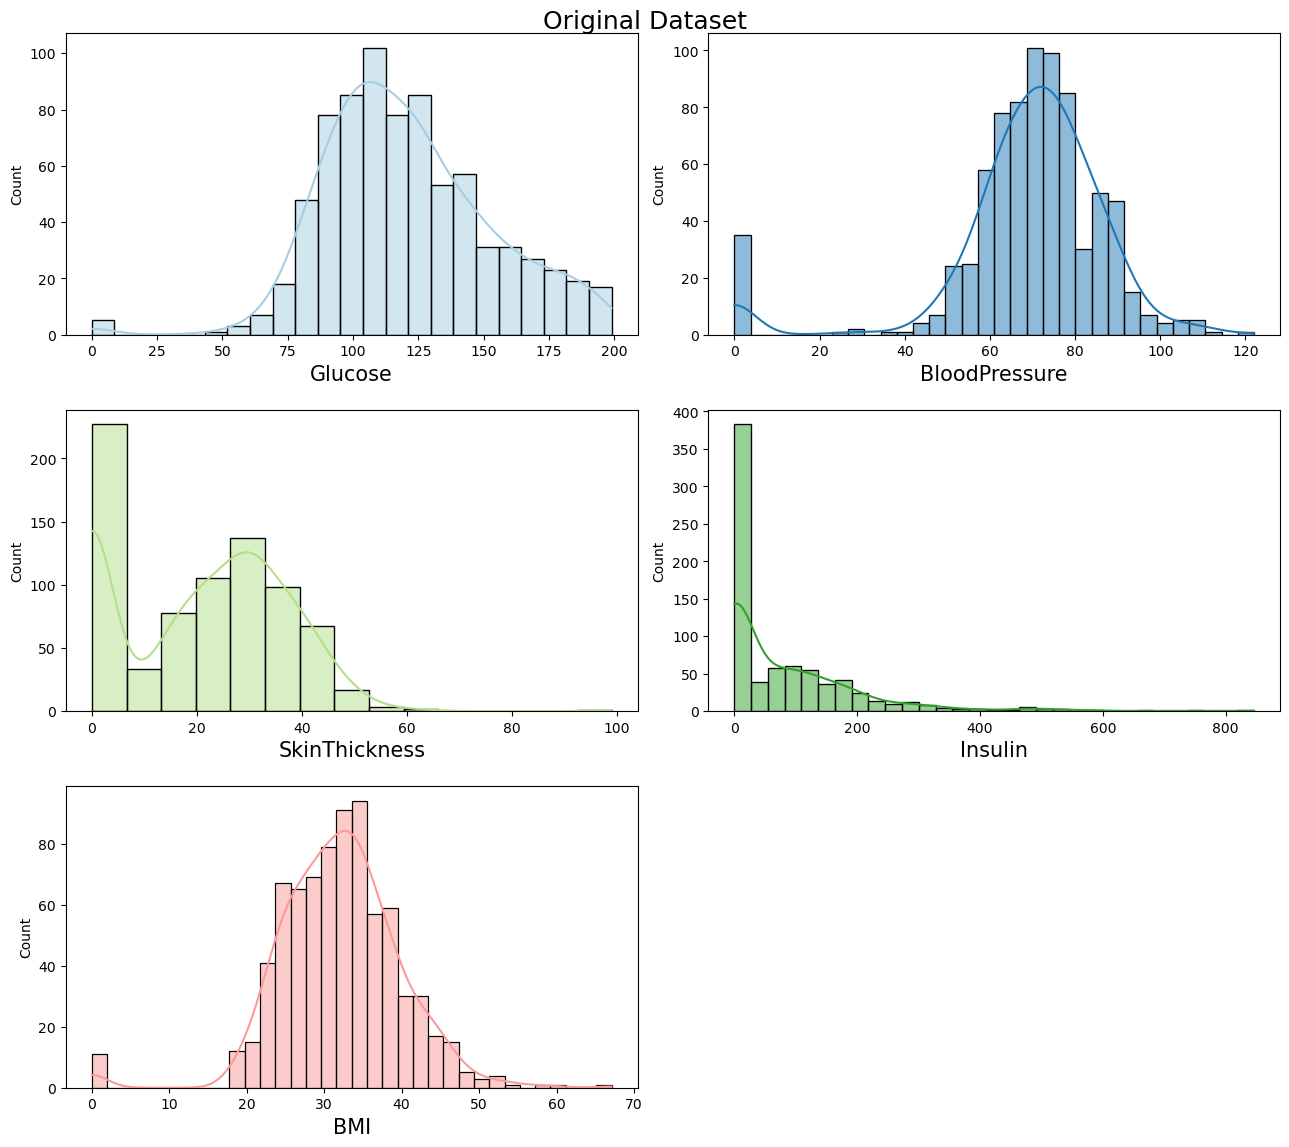

In [ ]:
hist_plot(df, title='Original Dataset')

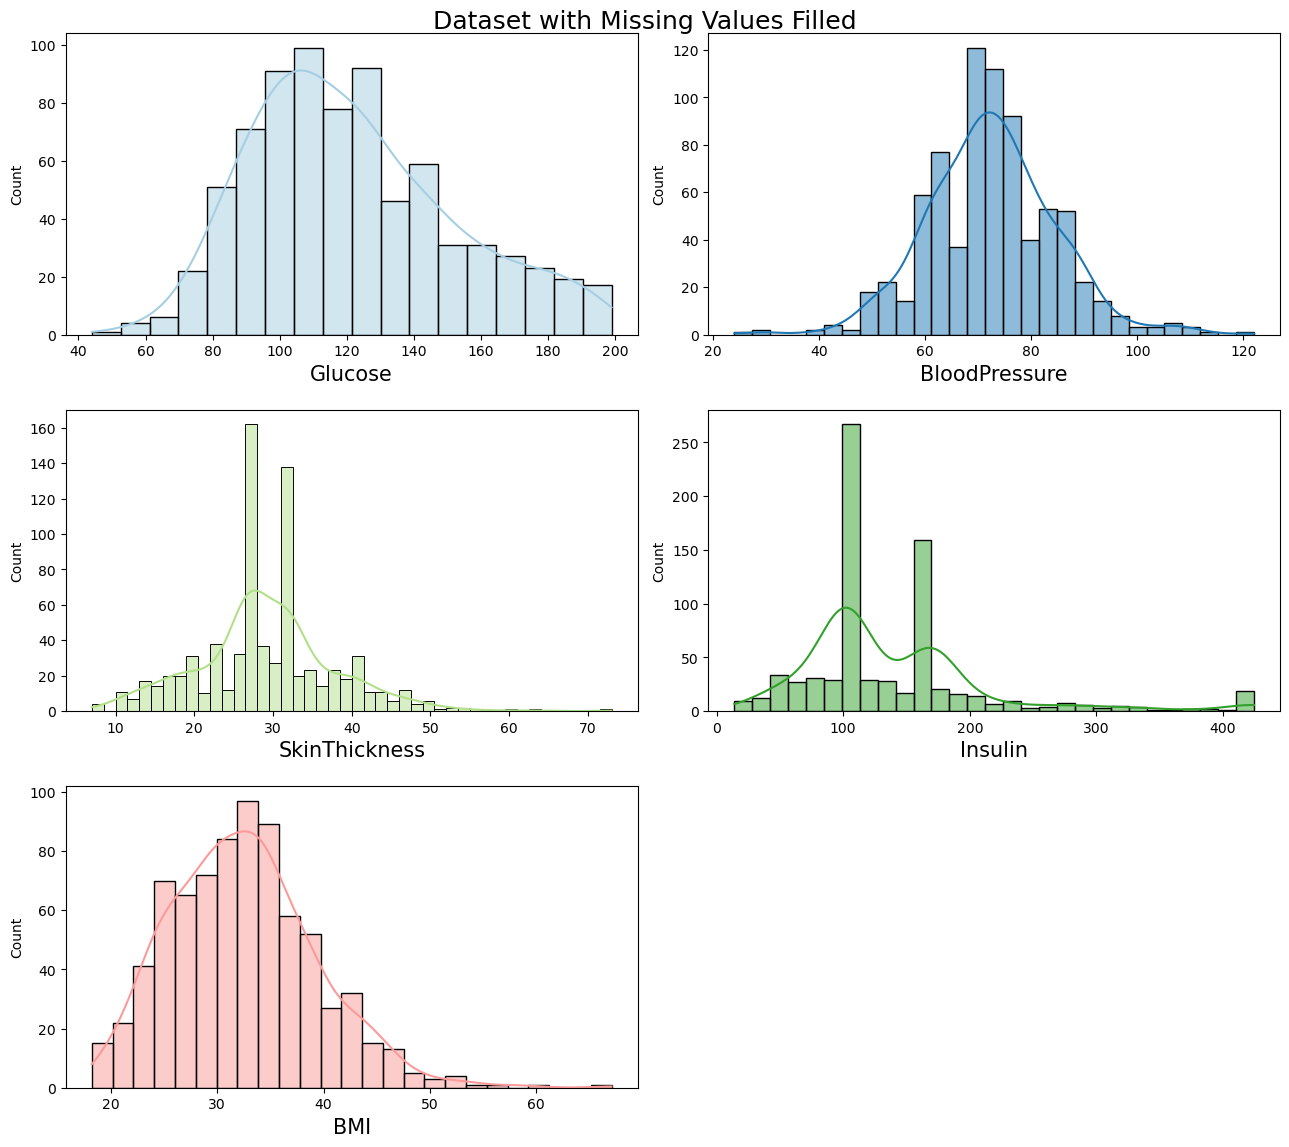

In [ ]:
hist_plot(df_copy, title='Dataset with Missing Values Filled')

<a id="section-nine"></a>
## **III. DIABETES RATIO**

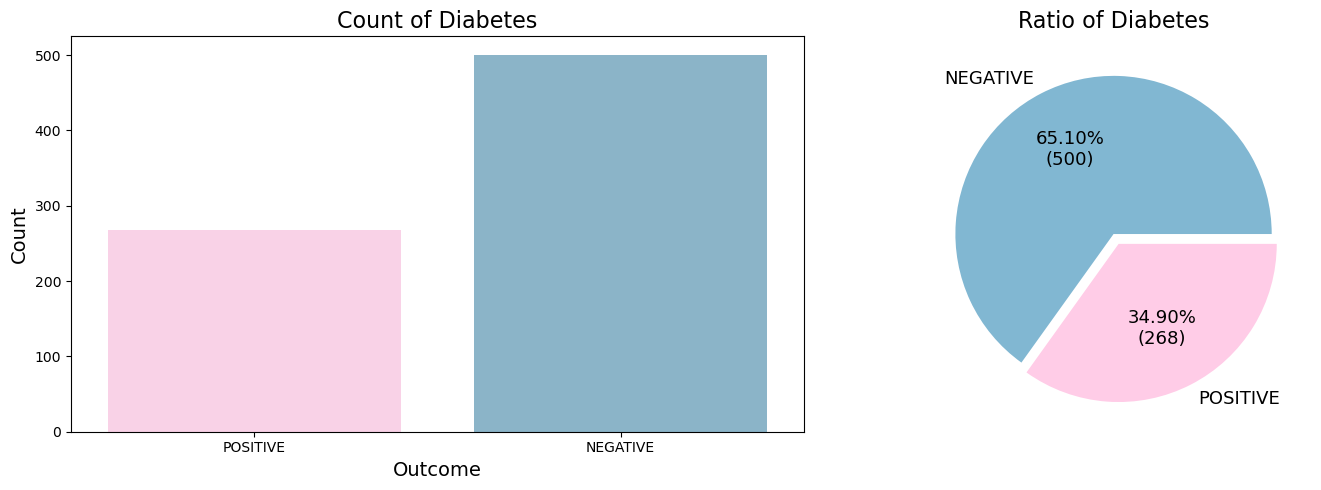

In [ ]:
fig,  axs = plt.subplots(1,2, figsize = (15, 5))

ax = sns.countplot(data=df_copy,
                   x=df_copy['Outcome'].replace({0: 'NEGATIVE', 1: 'POSITIVE'}),
                   ax = axs[0],
                   palette=["#ffcce7", "#81b7d2"]);

ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Diabetes", fontsize=16)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.2f}%\n({absolute:d})"

ax2 = df_copy['Outcome'].value_counts().plot.pie(explode=[0,0.07],
                                                 colors=["#81b7d2", "#ffcce7"],
                                                 autopct=lambda pct: func(pct, df['Outcome'].value_counts()),
                                                 ylabel='',
                                                 labels=['NEGATIVE', 'POSITIVE'],
                                                 ax = axs[1],
                                                 textprops=dict(color="black", size=13));
axs[1].set_title("Ratio of Diabetes", fontsize=16)

plt.tight_layout()
plt.show()

<a id="section-ten"></a>
## **VISUALIZATION of EXTRACTED FEATURES**

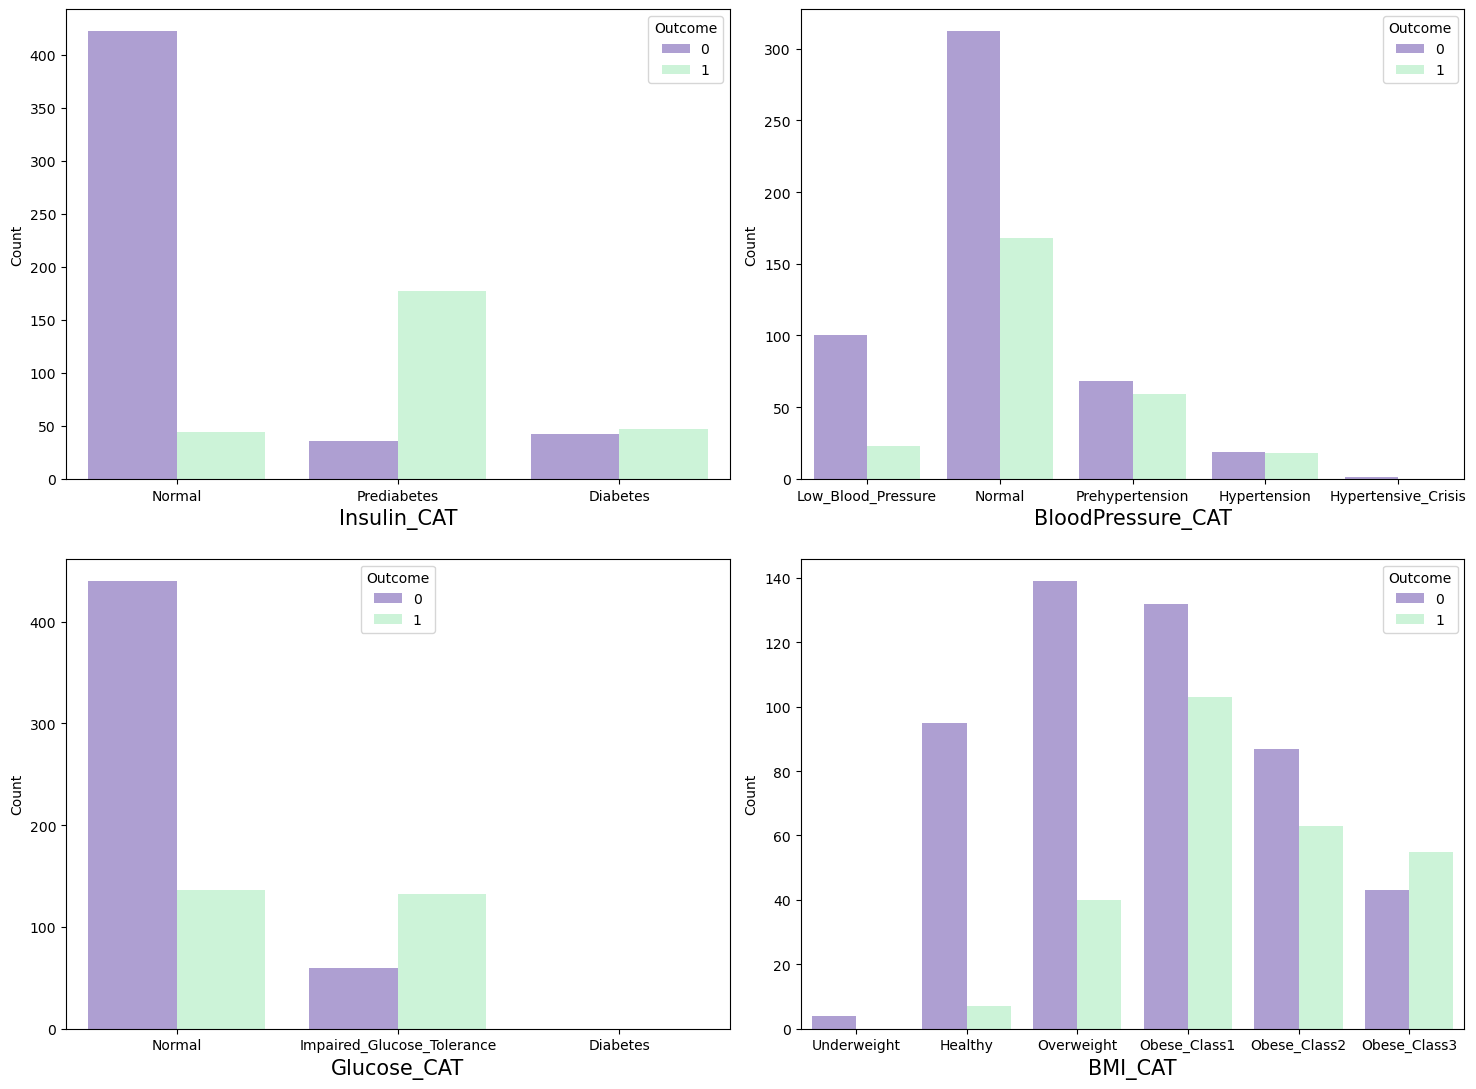

In [ ]:
new_cols = ["Insulin_CAT", "BloodPressure_CAT", "Glucose_CAT", "BMI_CAT"]

a = 2
b = 2
c = 1
fig = plt.figure(figsize = (15, 11))
for col in new_cols:
    plt.subplot(a, b, c)
    ax = sns.countplot(df_copy,
                       x=df_copy[col],
                       hue=df.Outcome,
                       palette=["#AA96DA", "#C5FAD5"])
    plt.ylabel('Count')
    plt.xlabel(f'{col}', size=15)
    c = c + 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.17)
plt.show()

<a id="section-eleven"></a>
# **MACHINE LEARNING**

In [ ]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
def data_prep(X, y):

    index = X.index
    dataframe = X.merge(y.to_frame(), left_index=True, right_index=True).set_index(index)

    # get cols
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe, print_results=False)

    # replace outliers
    [replace_with_thresholds(dataframe, col) for col in num_cols]

    # Treat zero values as missing values after acquiring domain knowledge
    missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    for col in missing_value:
        dataframe[col] = np.where(dataframe[col] == 0, np.nan, dataframe[col])
    dataframe = dataframe.fillna(dataframe.groupby('Outcome').transform('median'))

    # Feature Engineering
    feature_extraction(dataframe)

    # Scaling
    rs = RobustScaler()
    dataframe[num_cols] = rs.fit_transform(dataframe[num_cols])

    # binary encoding
    binary_cols = [col for col in dataframe.columns
                   if dataframe[col].dtype not in ["int64", "float64"]
                   and dataframe[col].nunique() == 2]
    for col in binary_cols:
        label_encoder(dataframe, col)

    # One-hot-encoding
    ohe_cols = [col for col in dataframe.columns if 12 >= dataframe[col].nunique() > 2]
    dataframe = one_hot_encoder(dataframe, ohe_cols, drop_first=True)

    X = dataframe.drop(["Outcome"], axis=1)
    y = dataframe["Outcome"]
    return X, y

In [ ]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20, random_state=42)

🚀 First take a look baseline scores of raw datasets. That's why I fit the models just before data preprocessing.

In [ ]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X_train, y_train, scoring="accuracy")

Base Models....
accuracy: 0.7671 (LR) 
accuracy: 0.7182 (KNN) 
accuracy: 0.7312 (CART) 
accuracy: 0.7752 (RF) 
accuracy: 0.7638 (GBM) 
accuracy: 0.7508 (XGBoost) 
accuracy: 0.7378 (LightGBM) 


In [ ]:
X_train, y_train = data_prep(X_train, y_train)
X_test, y_test = data_prep(X_test, y_test)

In [ ]:
def base_models(X, y):
    models = [("LR", LogisticRegression(solver='lbfgs', max_iter=3000)),
              ("KNN", KNeighborsClassifier()),
              ("CART", DecisionTreeClassifier()),
              ("RF", RandomForestClassifier()),
              ("GBM", GradientBoostingClassifier()),
              ("XGBoost", XGBClassifier(eval_metric='logloss')),
              ("LightGBM", LGBMClassifier()),]
    for name, classifier in models:
        cv_results = cross_validate(classifier, X, y, cv=5, scoring="accuracy")
        print(f"Accuracy: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
classifiers  =[('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [ ]:
def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("\nHyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [ ]:
def voting_classifier(best_models, X, y):
    print("\nVoting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [ ]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    voting_clf = voting_classifier(best_models, X, y)
    return voting_clf, best_models

voting_clf, best_models = fit_models(X_train, y_train)

Accuracy: 0.8731 (LR) 
Accuracy: 0.8535 (KNN) 
Accuracy: 0.8289 (CART) 
Accuracy: 0.8844 (RF) 
Accuracy: 0.8893 (GBM) 
Accuracy: 0.8909 (XGBoost) 
Accuracy: 0.8925 (LightGBM) 

Hyperparameter Optimization....
########## KNN ##########
accuracy (Before): 0.8535
accuracy (After): 0.8616
KNN best params: {'n_neighbors': 11}

########## CART ##########
accuracy (Before): 0.8354
accuracy (After): 0.8615
CART best params: {'max_depth': 5, 'min_samples_split': 5}

########## RF ##########
accuracy (Before): 0.8893
accuracy (After): 0.8828
RF best params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 300}

########## XGBoost ##########
accuracy (Before): 0.8909
accuracy (After): 0.8974
XGBoost best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
accuracy (Before): 0.8925
accuracy (After): 0.9007
LightGBM best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 300}


In [ ]:
lgbm_model = best_models['LightGBM'].fit(X_train, y_train)

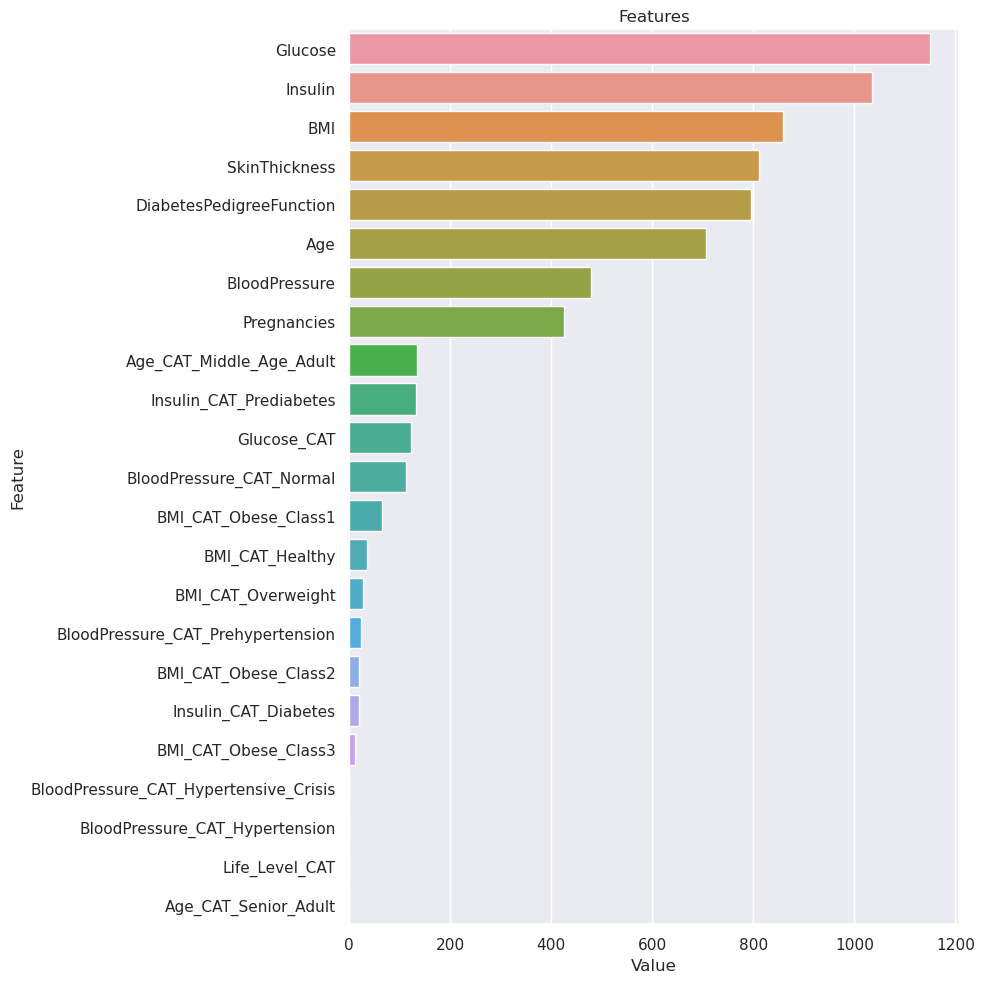

In [ ]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(lgbm_model, X_train)

<a id="section-twelve"></a>
# **MODEL PERFORMANCE**

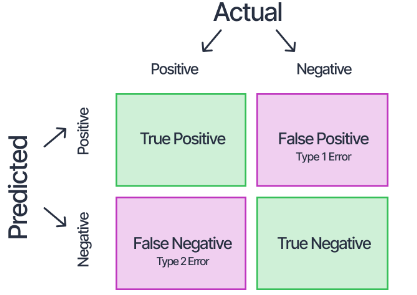


<center>
    <figcaption itemprop="Image Taken From Here"><a href="https://www.v7labs.com/blog/confusion-matrix-guide">Confusion Matrix</a></figcaption>
</center>

* **Confusion Matrix** : also known as the error matrix, allows visualization of the performance of an algorithm :
    - true positive (TP) : Diabetic correctly identified as diabetic
    - true negative (TN) : Healthy correctly identified as healthy
    - false positive (FP) : Healthy incorrectly identified as diabetic
    - false negative (FN) : Diabetic incorrectly identified as healthy


* **Metrics** :
    - Accuracy : How many prediction we made were true?
$$ Accuracy  = \frac {TP +TN} {TP + TN + FP + FN} $$
      
    - Precision : The proportion of positive cases that were correctly identified.
$$ Precision  = \frac {TP} {TP + FP} $$
         
    - Recall : The proportion of actual positive cases which are correctly identified.
$$ Recall  = \frac {TP} {TP + FN} $$
         
    - F1 Score :  F1-Score is the harmonic mean of precision and recall values for a classification problem.
$$ F1 Score  = 2 \frac {Precision  x  Recall} {Precision + Recall} $$
    
    

* **ROC Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.84      0.76      0.80        55

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



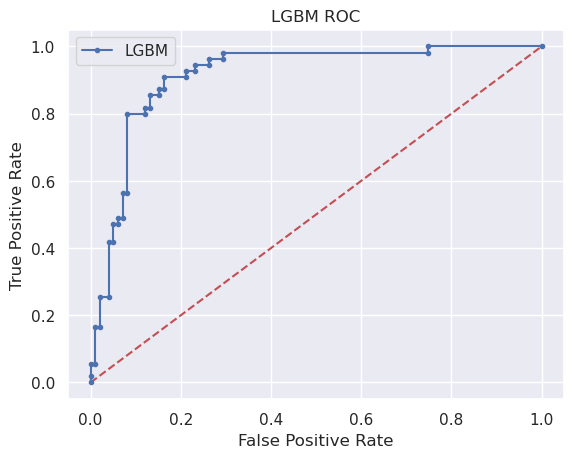

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LGBM ROC")
plt.legend()
plt.show()

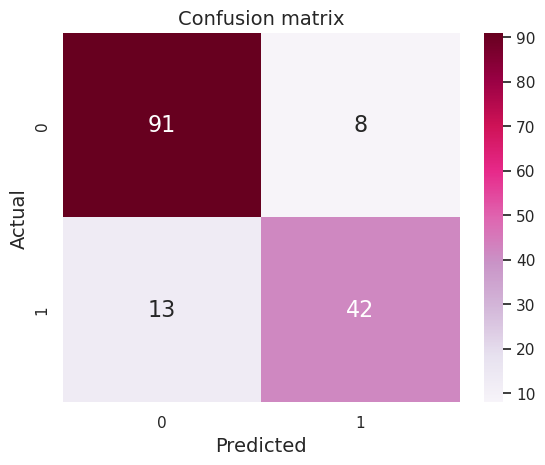

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True,
                cmap="PuRd",
                annot_kws={"size": 16})
plt.title('Confusion matrix', size=14)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14);

<a id="section-thirteen"></a>
# **CONCLUSION**

My finding shows that **Glucose, Insulin, and BMI**, respectively, have the most influence on a person's diabetes outcome. New features have more or less impact on accuracy. In addition, the effect of other preprocess technics should not be ignored.

In the table below, you can see the result of examining the **effectiveness of data preprocessing on training accuracy**, which is the core concept of the project.  First of all the algorithms were trained without data preprocess. Then some preprocessing techniques were applied to the raw data. To be more precise, these technics are:
* Handling Missing and Outlier Values
* Feature Extraction
* Feature Scaling

Last but not least a shallow hyperparameter optimization were applied to the chosen algorithms. LightGBM gives the best accuracy by a miniscule difference.


<center>

| Algorithm | Baseline Accuracy <br>Without Data Preprocess | Baseline Accuracy  <br>With Data Preprocess | Optimization
|  :---: | :---: |  :---: | :---:
| LR | 0.7671 | 0.8731 | - |
| KNN | 0.7182 | 0.8535 | 0.8616 |
| CART | 0.7312 | 0.8354 | 0.8615 |
| RF | 0.7752 | 0.8893 | 0.8828|
| GBM | 0.7638 | 0.8893 | -  |
| XGBoost | 0.7508 | 0.8909 | 0.8974 |
| LightGBM | 0.7378 | 0.8925 | 0.9007 |

</center>
